No  Surge [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Sway [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Heave [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Roll [deg]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Surge [m]  found for condition  Kaimal_TurbulentWindSet_2 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Sway [m]  found for condition  Kaimal_TurbulentWindSet_2 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Heave [m]  found for condition  Kaimal_TurbulentWindSet_2 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Roll [deg]  found for condition  Kaimal_TurbulentWindSet_2 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
 SUCCESS IMPORTING DATAS

c:\Users\antoingr\Documents\ResultsSIMA\_ResultsAndPostProcessSIMA\SIMHigh5.py:307: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


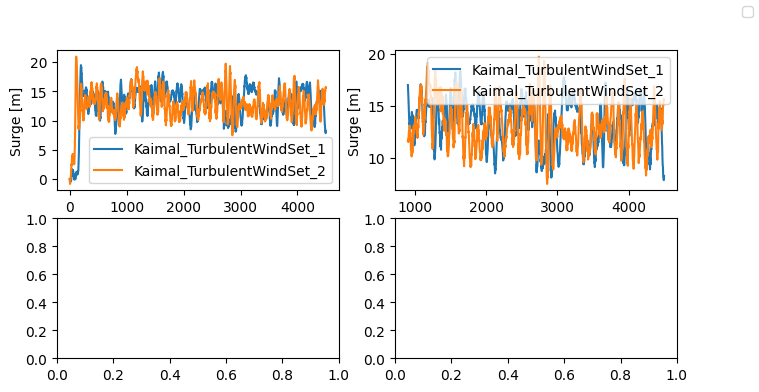

In [1]:
import numpy as np
import pandas as pd
import scipy.signal as sg
import matplotlib.pyplot as plt
import time as t 
from scipy.interpolate import make_smoothing_spline
from analysis_tools import *
from SIMHigh5 import SIMHigh5

# Checks

## Comparison on platform model

In [2]:
# h5file = r'.\_ResultsH5\DecayMulti\decay_tests_SERAG.h5'
h5file = r'.\_ResultsH5\Flexible_\FlexibleC1P5_KaimalTurbulence_Results.h5'
dynamic_keys = {
                'platform//Global total position//XGtranslationTotalmotion':'Surge [m]',
                'platform//Global total position//YGtranslationTotalmotion':'Sway [m]',
                'platform//Global total position//ZGtranslationTotalmotion':'Heave [m]',
                'platform//Global total position//XLrotationTotalmotion':'Roll [deg]',
                'platform//Global total position//YLrotationTotalmotion':'Pitch [deg]',
                'platform//Global total position//ZGrotationTotalmotion':'Yaw [deg]',
                'Origo/Wave elevation/Totalwaveelevation':'Elevation [m]',
}
H1 = SIMHigh5(h5file,dynamic_keys, source="file")

T_trans = 900
H1_perm = H1.skip_transient(T_trans)

No  Surge [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Sway [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Heave [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Roll [deg]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Pitch [deg]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Yaw [deg]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Elevation [m]  found for condition  Kaimal_TurbulentWindSet_1 on model  INO_OptiFLEX22MW_Flexible_C1P5 with analysis  Static .
No  Surge [m]  found for condition  Kaimal_TurbulentWindSet_2 on model  INO_OptiFLEX22MW_Flexible_C1P5 wi

In [ ]:
def error(x1, x2):
    return round(100 * np.linalg.norm(x1 - x2)/np.linalg.norm(x2),2)

def errorBRF(x_B, x_R, x_F):
    print('Error between Baseline and Rigid : ', error(x_B,x_R)) #round(100 * np.sqrt(np.mean((x_B - x_R)**2))/np.sqrt(np.mean(x_B**2)),2), ' %')
    # print('Error between Baseline and Flexible : ', error(x_B,x_F)) #round(100 * np.sqrt(np.mean((x_B - x_F)**2))/np.sqrt(np.mean(x_B**2)), 2), ' %')
    print('Error between Rigid and Flexible : ', error(x_F,x_R)) #round(100 * np.sqrt(np.mean((x_R - x_F)**2))/np.sqrt(np.mean(x_B**2)), 2), ' %')
    print('-----------------------------------')

### Time serie analysis

#### One timeserie

count    90000.000000
mean        12.921616
std          3.137065
min         -0.588854
25%         11.588808
50%         13.597933
75%         14.824419
max         19.194431
Name: Surge [m], dtype: float64
count    90000.000000
mean         3.575190
std          1.215091
min         -2.837825
25%          3.083337
50%          3.759690
75%          4.342272
max          5.575592
Name: Pitch [deg], dtype: float64
count    90000.000000
mean         0.218711
std          0.970470
min         -2.525768
25%         -0.440454
50%          0.206254
75%          0.901642
max          3.234159
Name: Yaw [deg], dtype: float64


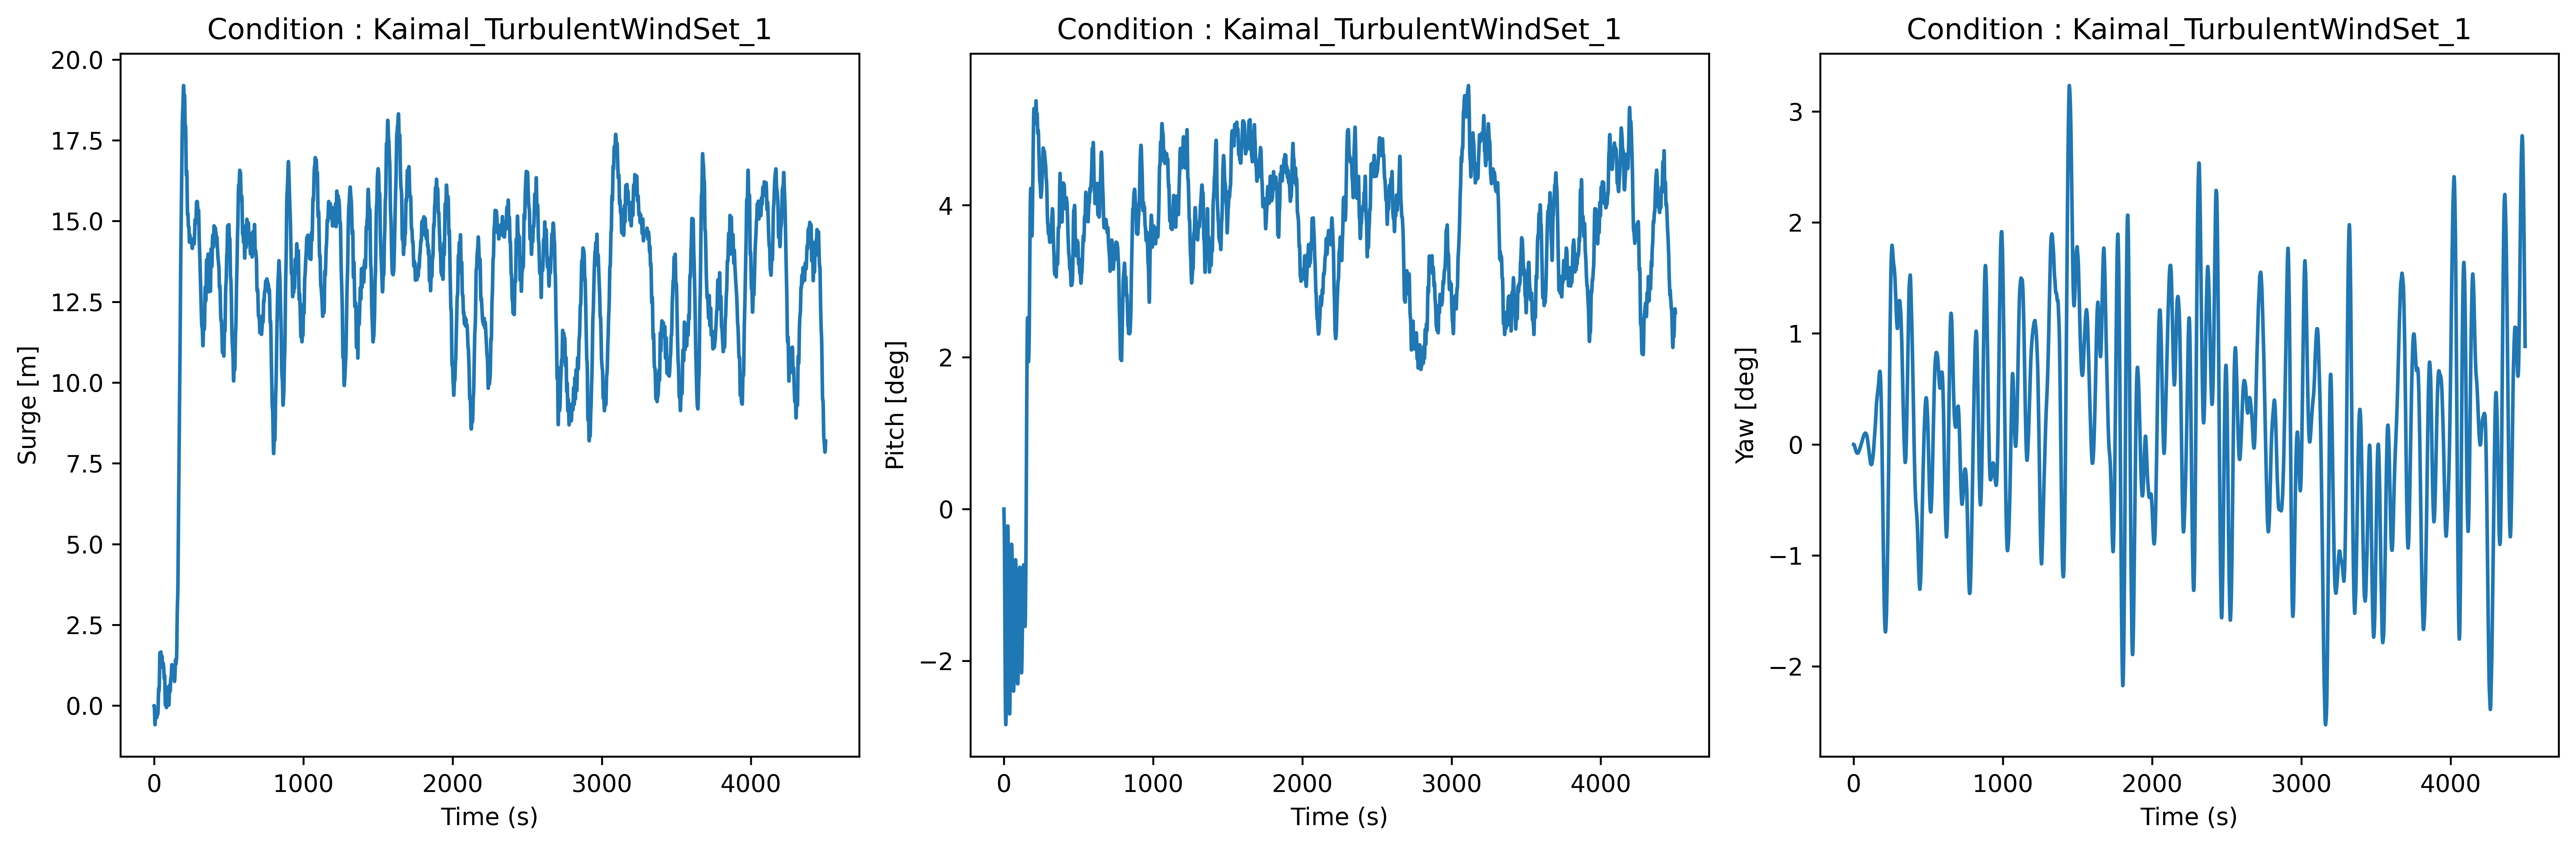

In [3]:
outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]']
cond = H1_perm.df.coords['condition'].values[0]
fig,ax = plt.subplots(1,len(outputs), figsize=(15, 5), dpi=600)

for j,output in enumerate(outputs):
    time, serie = H1.timeserie({'model':'INO_OptiFLEX22MW_Flexible_C1P5', 'condition':cond, 'analysis':'Dynamic'}, output)
    ax[j].plot(time, serie)
    ax[j].set_title('Condition : ' + cond)
    ax[j].set_xlabel('Time (s)')
    ax[j].set_ylabel(output)

fig.tight_layout()

#### Multiple timeseries

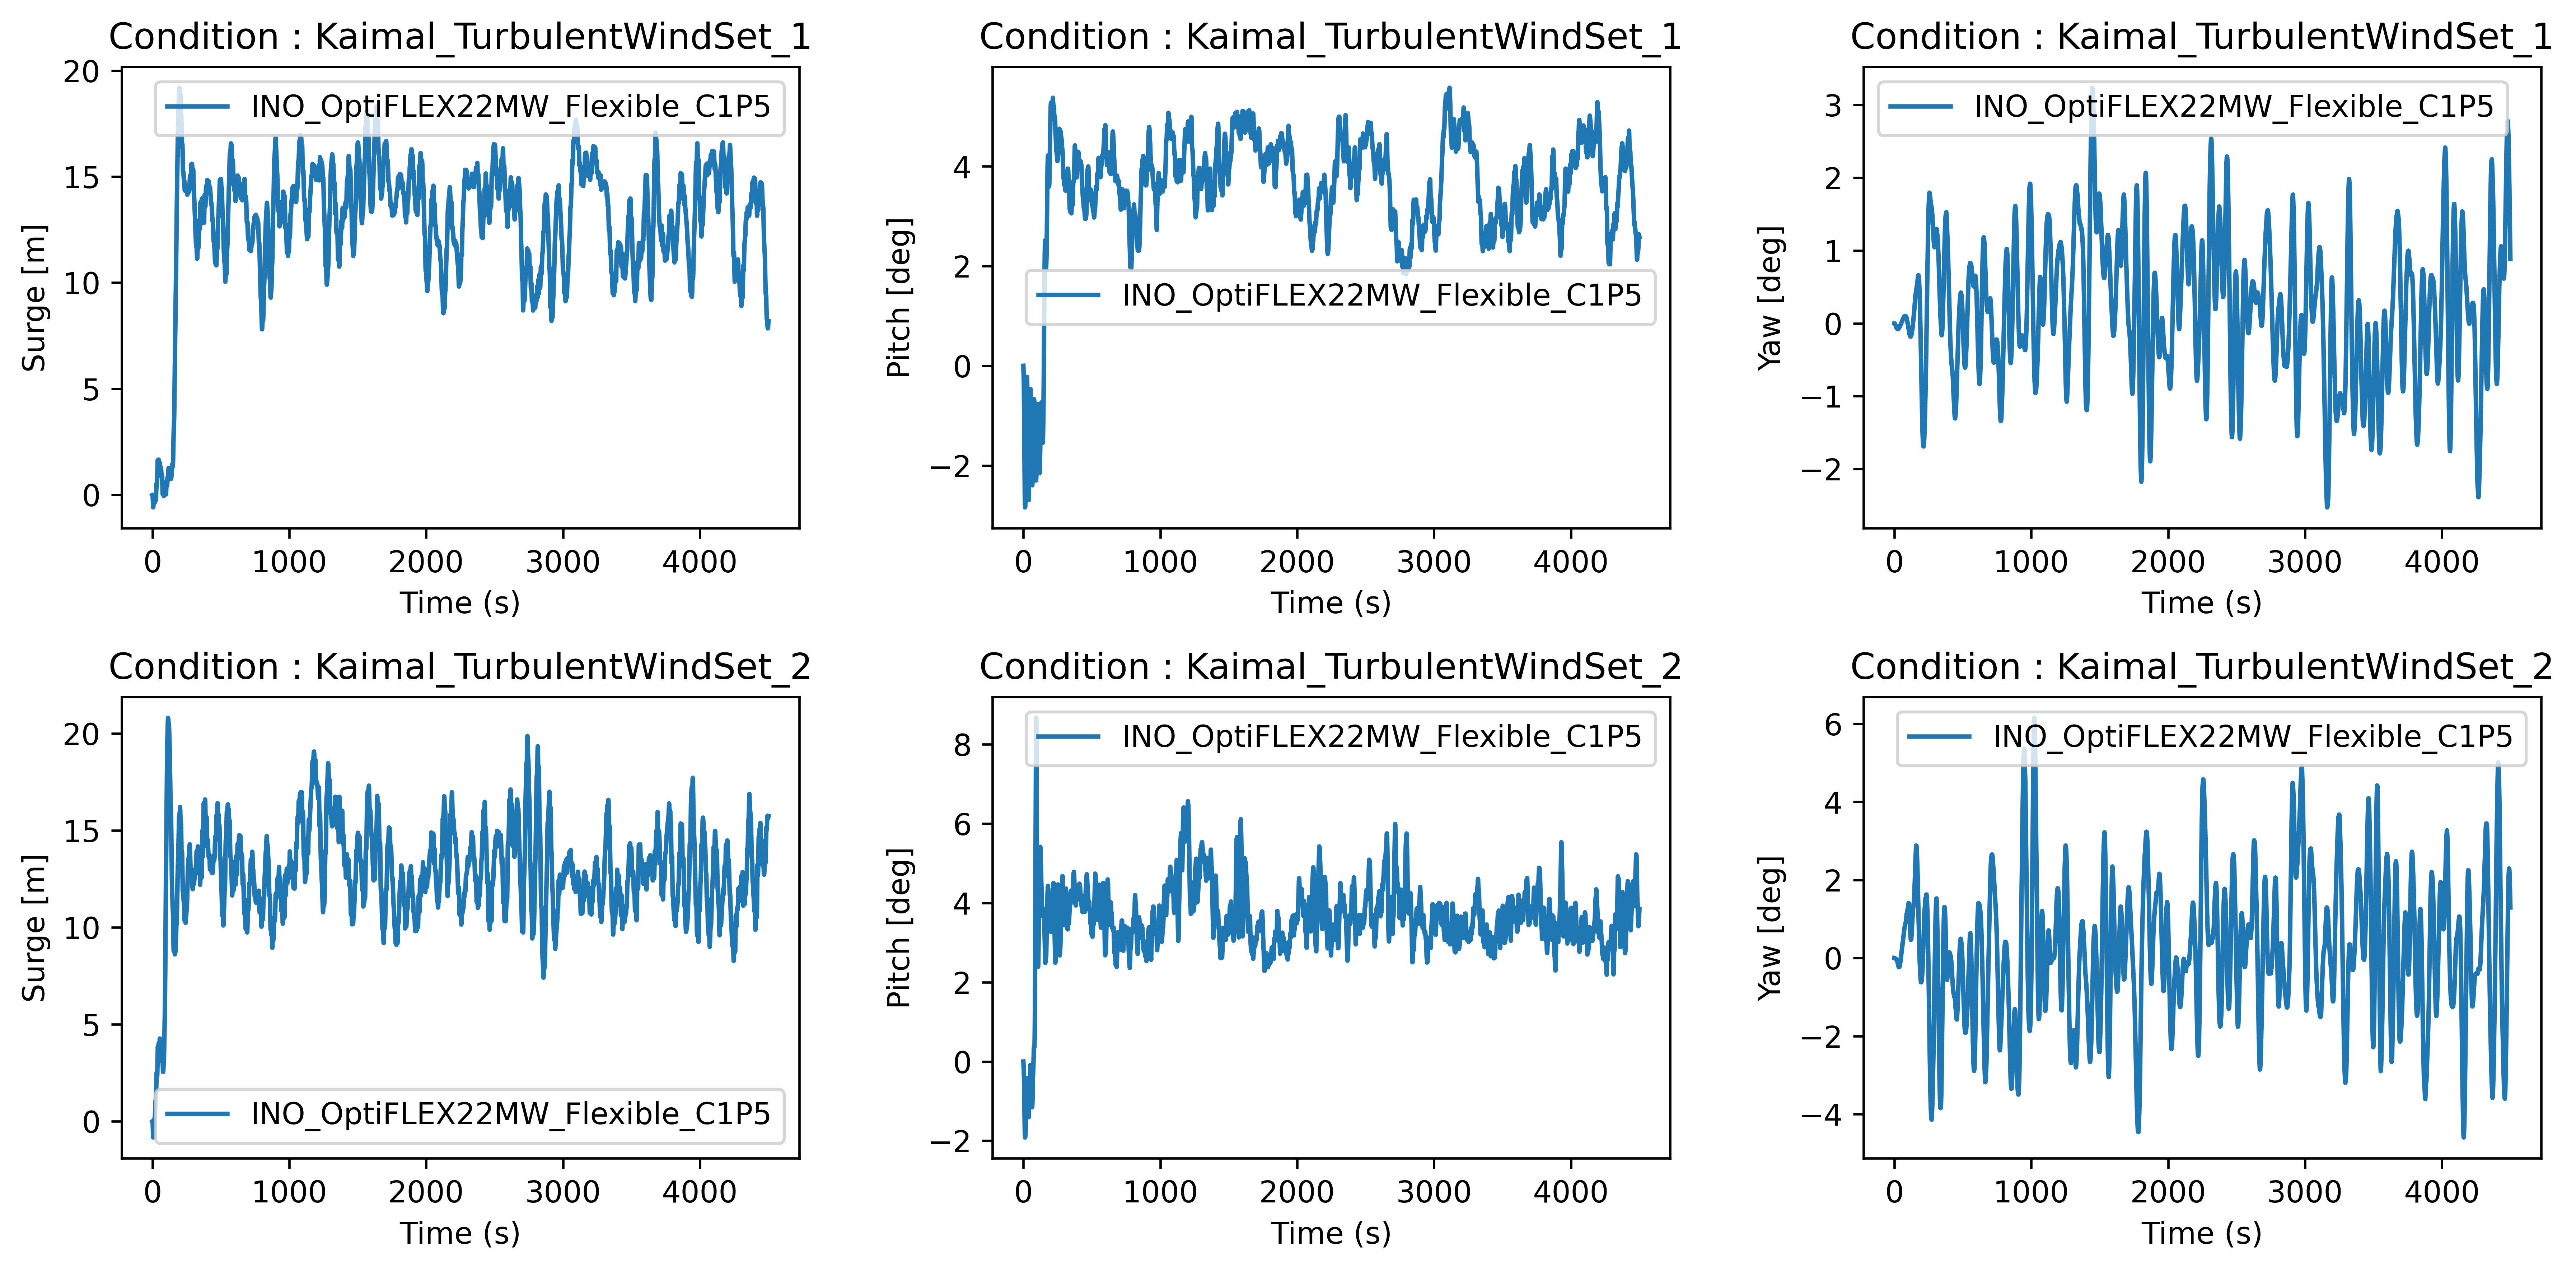

In [4]:
outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]']
conds = H1_perm.df.coords['condition'].values
fig,ax = plt.subplots(len(conds),len(outputs), figsize=(12, 6), dpi=600)

for i, cond in enumerate(conds):
    for j,output in enumerate(outputs):
        H1.comparePlot_timeseries(ax[i,j],'model',{'condition':cond, 'analysis':'Dynamic'},output)
        ax[i,j].set_title('Condition : ' + cond)
        ax[i,j].set_xlabel('Time (s)')
        ax[i,j].set_ylabel(output)
        # errorBRF(*timeseries)


fig.tight_layout()



## Comparison on wind model

In [5]:
dynamic_keys = {
                'platform//Global total position//XGtranslationTotalmotion':'Surge [m]',
                'platform//Global total position//YGtranslationTotalmotion':'Sway [m]',
                'platform//Global total position//ZGtranslationTotalmotion':'Heave [m]',
                'platform//Global total position//XLrotationTotalmotion':'Roll [deg]',
                'platform//Global total position//YLrotationTotalmotion':'Pitch [deg]',
                'platform//Global total position//ZGrotationTotalmotion':'Yaw [deg]',
                'Origo/Wave elevation/Totalwaveelevation':'Elevation [m]',
}

h5_file_constwind = r'.\_ResultsH5\resOptiflexV0\Baseline_ConstWind_Results.h5'
h5_file_kaimal = r'.\_ResultsH5\resOptiflexV0\Baseline_KaimalTurbulence_Results.h5'
h5_file_mann = r'.\_ResultsH5\resOptiflexV0\Baseline_MannTurbulence_Results.h5'

H1 = SIMHigh5(h5_file_constwind,dynamic_keys, source="file")
H2 = SIMHigh5(h5_file_kaimal,dynamic_keys, source="file")
H3 = SIMHigh5(h5_file_mann,dynamic_keys, source="file")

H1.merge([H2,H3])


T_trans = 900
H1_perm = H1.skip_transient(T_trans)



No  Surge [m]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Sway [m]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Heave [m]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Roll [deg]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Pitch [deg]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Yaw [deg]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Elevation [m]  found for condition  ConstantWindSet_1 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Surge [m]  found for condition  ConstantWindSet_2 on model  INO_OptiFLEX22MW_Baseline with analysis  Static .
No  Sway [m]  found for condition  ConstantWindSet_2 on model  INO_OptiFLEX22MW_Ba

# Analysis

### Load everything

In [6]:
# load_list = [
#     r'.\_ResultsH5\Baseline_\Baseline_ConstWind_Results.h5',
# r'.\_ResultsH5\Baseline_\Baseline_KaimalTurbulence_Results.h5',
# r'.\_ResultsH5\Baseline_\Baseline_MannTurbulence_Results.h5',
# r'.\_ResultsH5\Flexible_\FlexibleC1P5_ConstWind_Results.h5',
# r'.\_ResultsH5\Flexible_\FlexibleC1P5_KaimalTurbulence_Results.h5',
# r'.\_ResultsH5\Flexible_\FlexibleC1P5_MannTurbulence_Results.h5'
# ]

load_list = [
    r'.\_ResultsH5\Baseline_\BaselineV02_Mann_Results.h5',
    r'.\_ResultsH5\Baseline_\BaselineV02_Kaimal_Results.h5'
]

dynamic_keys = {
                'platform//Global total position//XGtranslationTotalmotion':'Surge [m]',
                'platform//Global total position//YGtranslationTotalmotion':'Sway [m]',
                'platform//Global total position//ZGtranslationTotalmotion':'Heave [m]',
                'platform//Global total position//XLrotationTotalmotion':'Roll [deg]',
                'platform//Global total position//YLrotationTotalmotion':'Pitch [deg]',
                'platform//Global total position//ZGrotationTotalmotion':'Yaw [deg]',
                'line1//segment_1//node_1//Displacement in x - direction':'Xfairlead1 [m]',
                'line1//segment_1//node_1//Displacement in y - direction':'Yfairlead1 [m]',
                'line1//segment_1//node_1//Displacement in z - direction':'Zfairlead1 [m]',
                'Origo/Wave elevation/Totalwaveelevation':'Elevation [m]',
                'nacelle/Wind velocity/Velocityinmaindirection':'WindVelocity [m/s]',
                'turbine/Rotor speed (rpm)':'RotorSpeed [rpm]',
                'tower//segment_1//element_1//Mom_ about local y-axis, end 1':'ForeAftBendingMoment [kNm]',
                # 'turbine/Incoming wind speed X-dir in shaft system':'WindVelocity [m/s]',
                'line1//segment_1//element_1//Axial force':'TensionTopChainL1 [kN]',
                'line1//segment_2//element_1//Axial force':'TensionTopRopeL1 [kN]',
                'line1//segment_3//element_1//Axial force':'TensionBottomRopeL1 [kN]',
                'line1//segment_4//element_1//Axial force':'TensionBottomChainL1 [kN]',
                'line2//segment_1//element_1//Axial force':'TensionTopChainL2 [kN]',
                'line2//segment_2//element_1//Axial force':'TensionTopRopeL2 [kN]',
                'line2//segment_3//element_1//Axial force':'TensionBottomRopeL2 [kN]',
                'line2//segment_4//element_1//Axial force':'TensionBottomChainL2 [kN]',
                'line3//segment_1//element_1//Axial force':'TensionTopChainL3 [kN]',
                'line3//segment_2//element_1//Axial force':'TensionTopRopeL3 [kN]',
                'line3//segment_3//element_1//Axial force':'TensionBottomRopeL3 [kN]',
                'line3//segment_4//element_1//Axial force':'TensionBottomChainL3 [kN]',
                }

H1 = SIMHigh5(load_list[0],dynamic_keys, source="file")

H1.merge([SIMHigh5(load_list[i],dynamic_keys, source="file") for i in range(1,len(load_list))])

T_trans = 900
H1_perm = H1.skip_transient(T_trans)

No  Surge [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Sway [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Heave [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Roll [deg]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Pitch [deg]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Yaw [deg]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Xfairlead1 [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Yfairlead1 [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Zfairlead1 [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  Elevation [m]  found for condition  MannSet_1 on model  Baseline with analysis  Static .
No  WindVelocity [m/s]  found for condition  MannSet_1 on model  Baseline with analysis  

## Checks

### Turbulent wind

#### Timeseries of the turbulent wind

C:\Users\antoingr\AppData\Local\Temp\ipykernel_30872\1529605871.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
C:\Users\antoingr\AppData\Local\Temp\ipykernel_30872\1529605871.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()
C:\Users\antoingr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\antoingr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


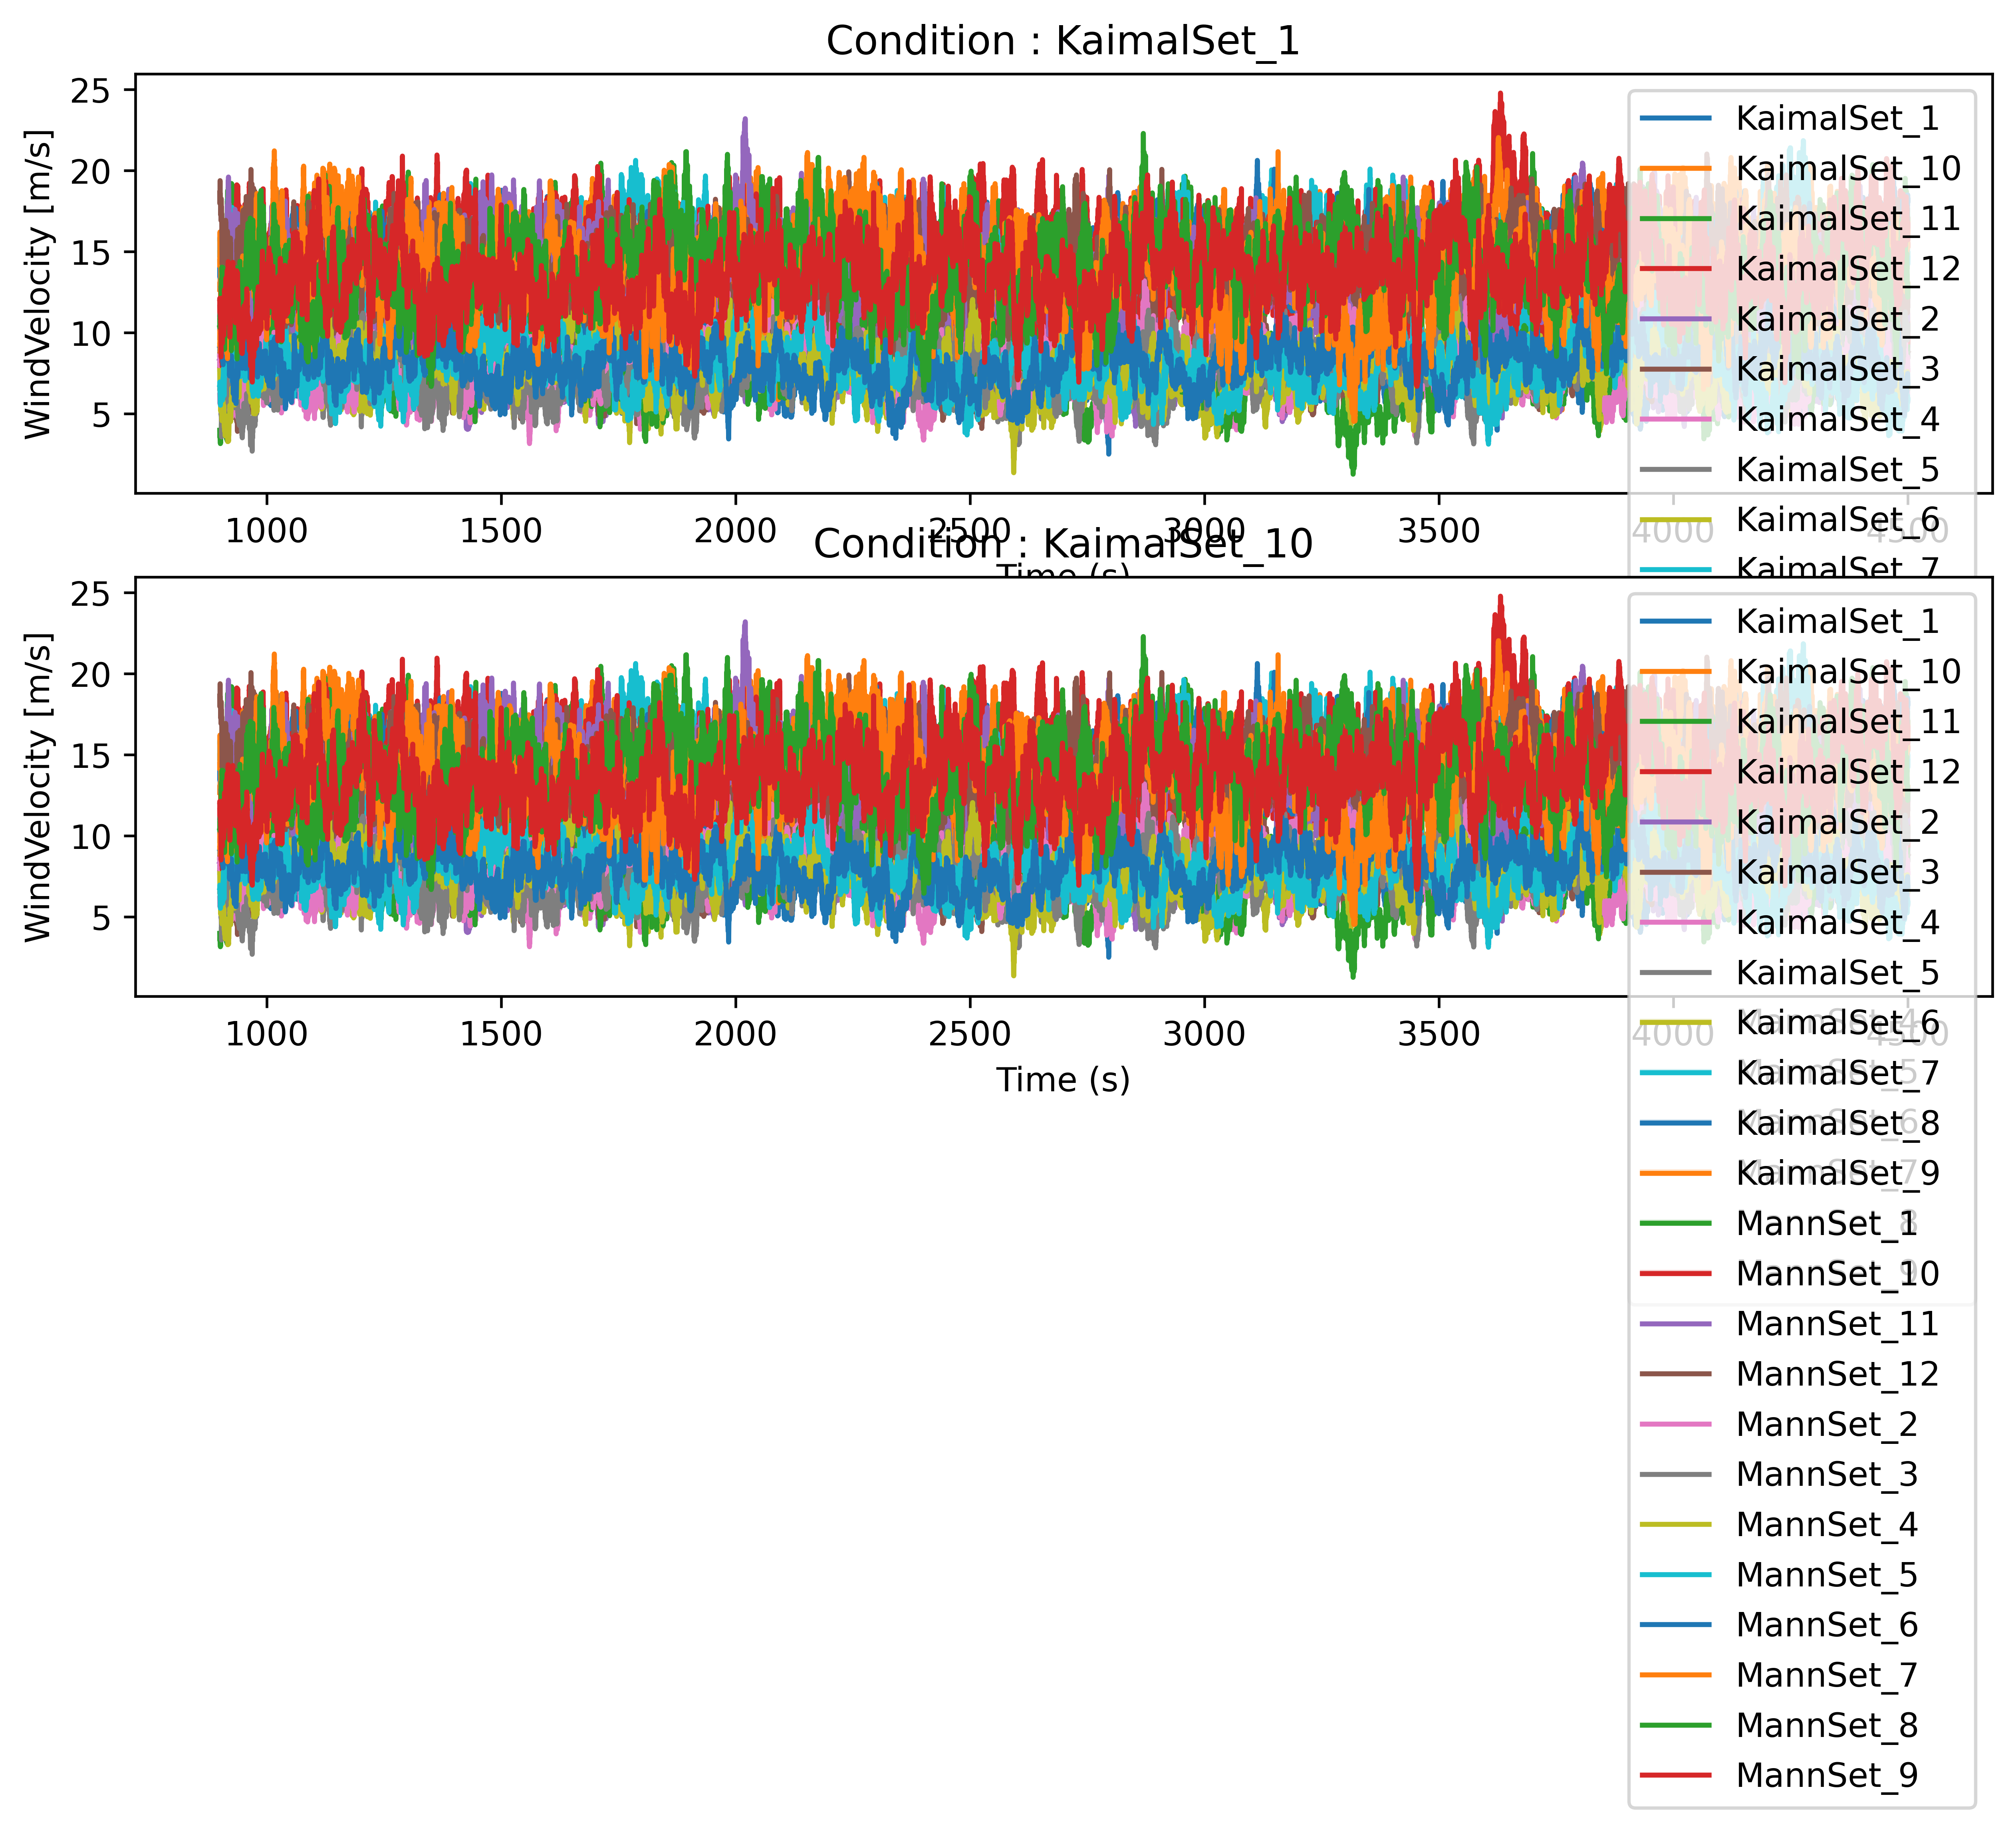

In [7]:
outputs = ['WindVelocity [m/s]']
conds = H1_perm.df.coords['condition'].values[:2]
fig,ax = plt.subplots(len(conds),len(outputs), figsize=(len(conds)*5, len(outputs)*5), dpi=600)

for i, cond in enumerate(conds):
    for j,output in enumerate(outputs):
        # H_sel = H1_perm.selection(dict(condition = ['Kaimal_TurbulentWindSet_1', 'Kaimal_TurbulentWindSet_2']))
        H1_perm.comparePlot_timeseries(ax[i],'condition',{'model':'Baseline', 'analysis':'Dynamic'},output)
        # H_sel.comparePlot_timeseries(ax[i],'model',{'condition':'Kaimal_TurbulentWindSet_1', 'analysis':'Dynamic'},output)
        ax[i].set_title('Condition : ' + cond)
        # errorBRF(*timeseries)


fig.tight_layout()

#### Mean and standard deviation of Wind and Rotor speed

In [8]:
outputs = ['WindVelocity [m/s]', 'RotorSpeed [rpm]']
conds = H1_perm.df.coords['condition'].values#[:2]
x_name = 'U_hub (m/s)'
x_vals = np.array([8,14])

print('create below a dictonary with the conditions associated with the correspondant value of x_val')
print('Here are the conditions : ')
print(conds)

create below a dictonary with the conditions associated with the correspondant value of x_val
Here are the conditions : 
['KaimalSet_1' 'KaimalSet_10' 'KaimalSet_11' 'KaimalSet_12' 'KaimalSet_2'
 'KaimalSet_3' 'KaimalSet_4' 'KaimalSet_5' 'KaimalSet_6' 'KaimalSet_7'
 'KaimalSet_8' 'KaimalSet_9' 'MannSet_1' 'MannSet_10' 'MannSet_11'
 'MannSet_12' 'MannSet_2' 'MannSet_3' 'MannSet_4' 'MannSet_5' 'MannSet_6'
 'MannSet_7' 'MannSet_8' 'MannSet_9']


In [9]:
# dict_cond_x = {
#     'ConstantWindSet_1':8,
#     'ConstantWindSet_2':14,
#     'Kaimal_TurbulentWindSet_1':8,
#     'Kaimal_TurbulentWindSet_2':14,
#     'Mann_TurbulentWindSet_1':8,
#     'Mann_TurbulentWindSet_2':14
# }
dict_cond_x = {'KaimalSet_1':8, 'KaimalSet_10':14, 'KaimalSet_11':14, 'KaimalSet_12':14, 'KaimalSet_2':8,
 'KaimalSet_3':8, 'KaimalSet_4':8, 'KaimalSet_5':8, 'KaimalSet_6':8, 'KaimalSet_7':14,
 'KaimalSet_8':14, 'KaimalSet_9':14, 'MannSet_1':8, 'MannSet_10':14, 'MannSet_11':14,
 'MannSet_12':14, 'MannSet_2':8, 'MannSet_3':8, 'MannSet_4':8, 'MannSet_5':8, 'MannSet_6':8,
 'MannSet_7':14, 'MannSet_8':14, 'MannSet_9':14}


----------Successfully extracted run to panda.Dataframe structure-----------

            Surge [m]  Sway [m]  Heave [m]  Roll [deg]  Pitch [deg]  \
time                                                                  
900.000013  16.997698 -0.127910   0.139497    0.260761     3.496790   
900.025013  16.996904 -0.128885   0.136512    0.259642     3.499066   
900.050013  16.996035 -0.129860   0.133474    0.258545     3.501314   
900.075013  16.995083 -0.130833   0.130381    0.257471     3.503530   
900.100013  16.994051 -0.131806   0.127234    0.256424     3.505710   

            Yaw [deg]  Xfairlead1 [m]  Yfairlead1 [m]  Zfairlead1 [m]  \
time                                                                    
900.000013   0.548563       75.025299        0.473191      -13.425098   
900.025013   0.546292       75.023994        0.469714      -13.430388   
900.050013   0.544024       75.022621        0.466247      -13.435705   
900.075013   0.541760       75.021172        0.462789     

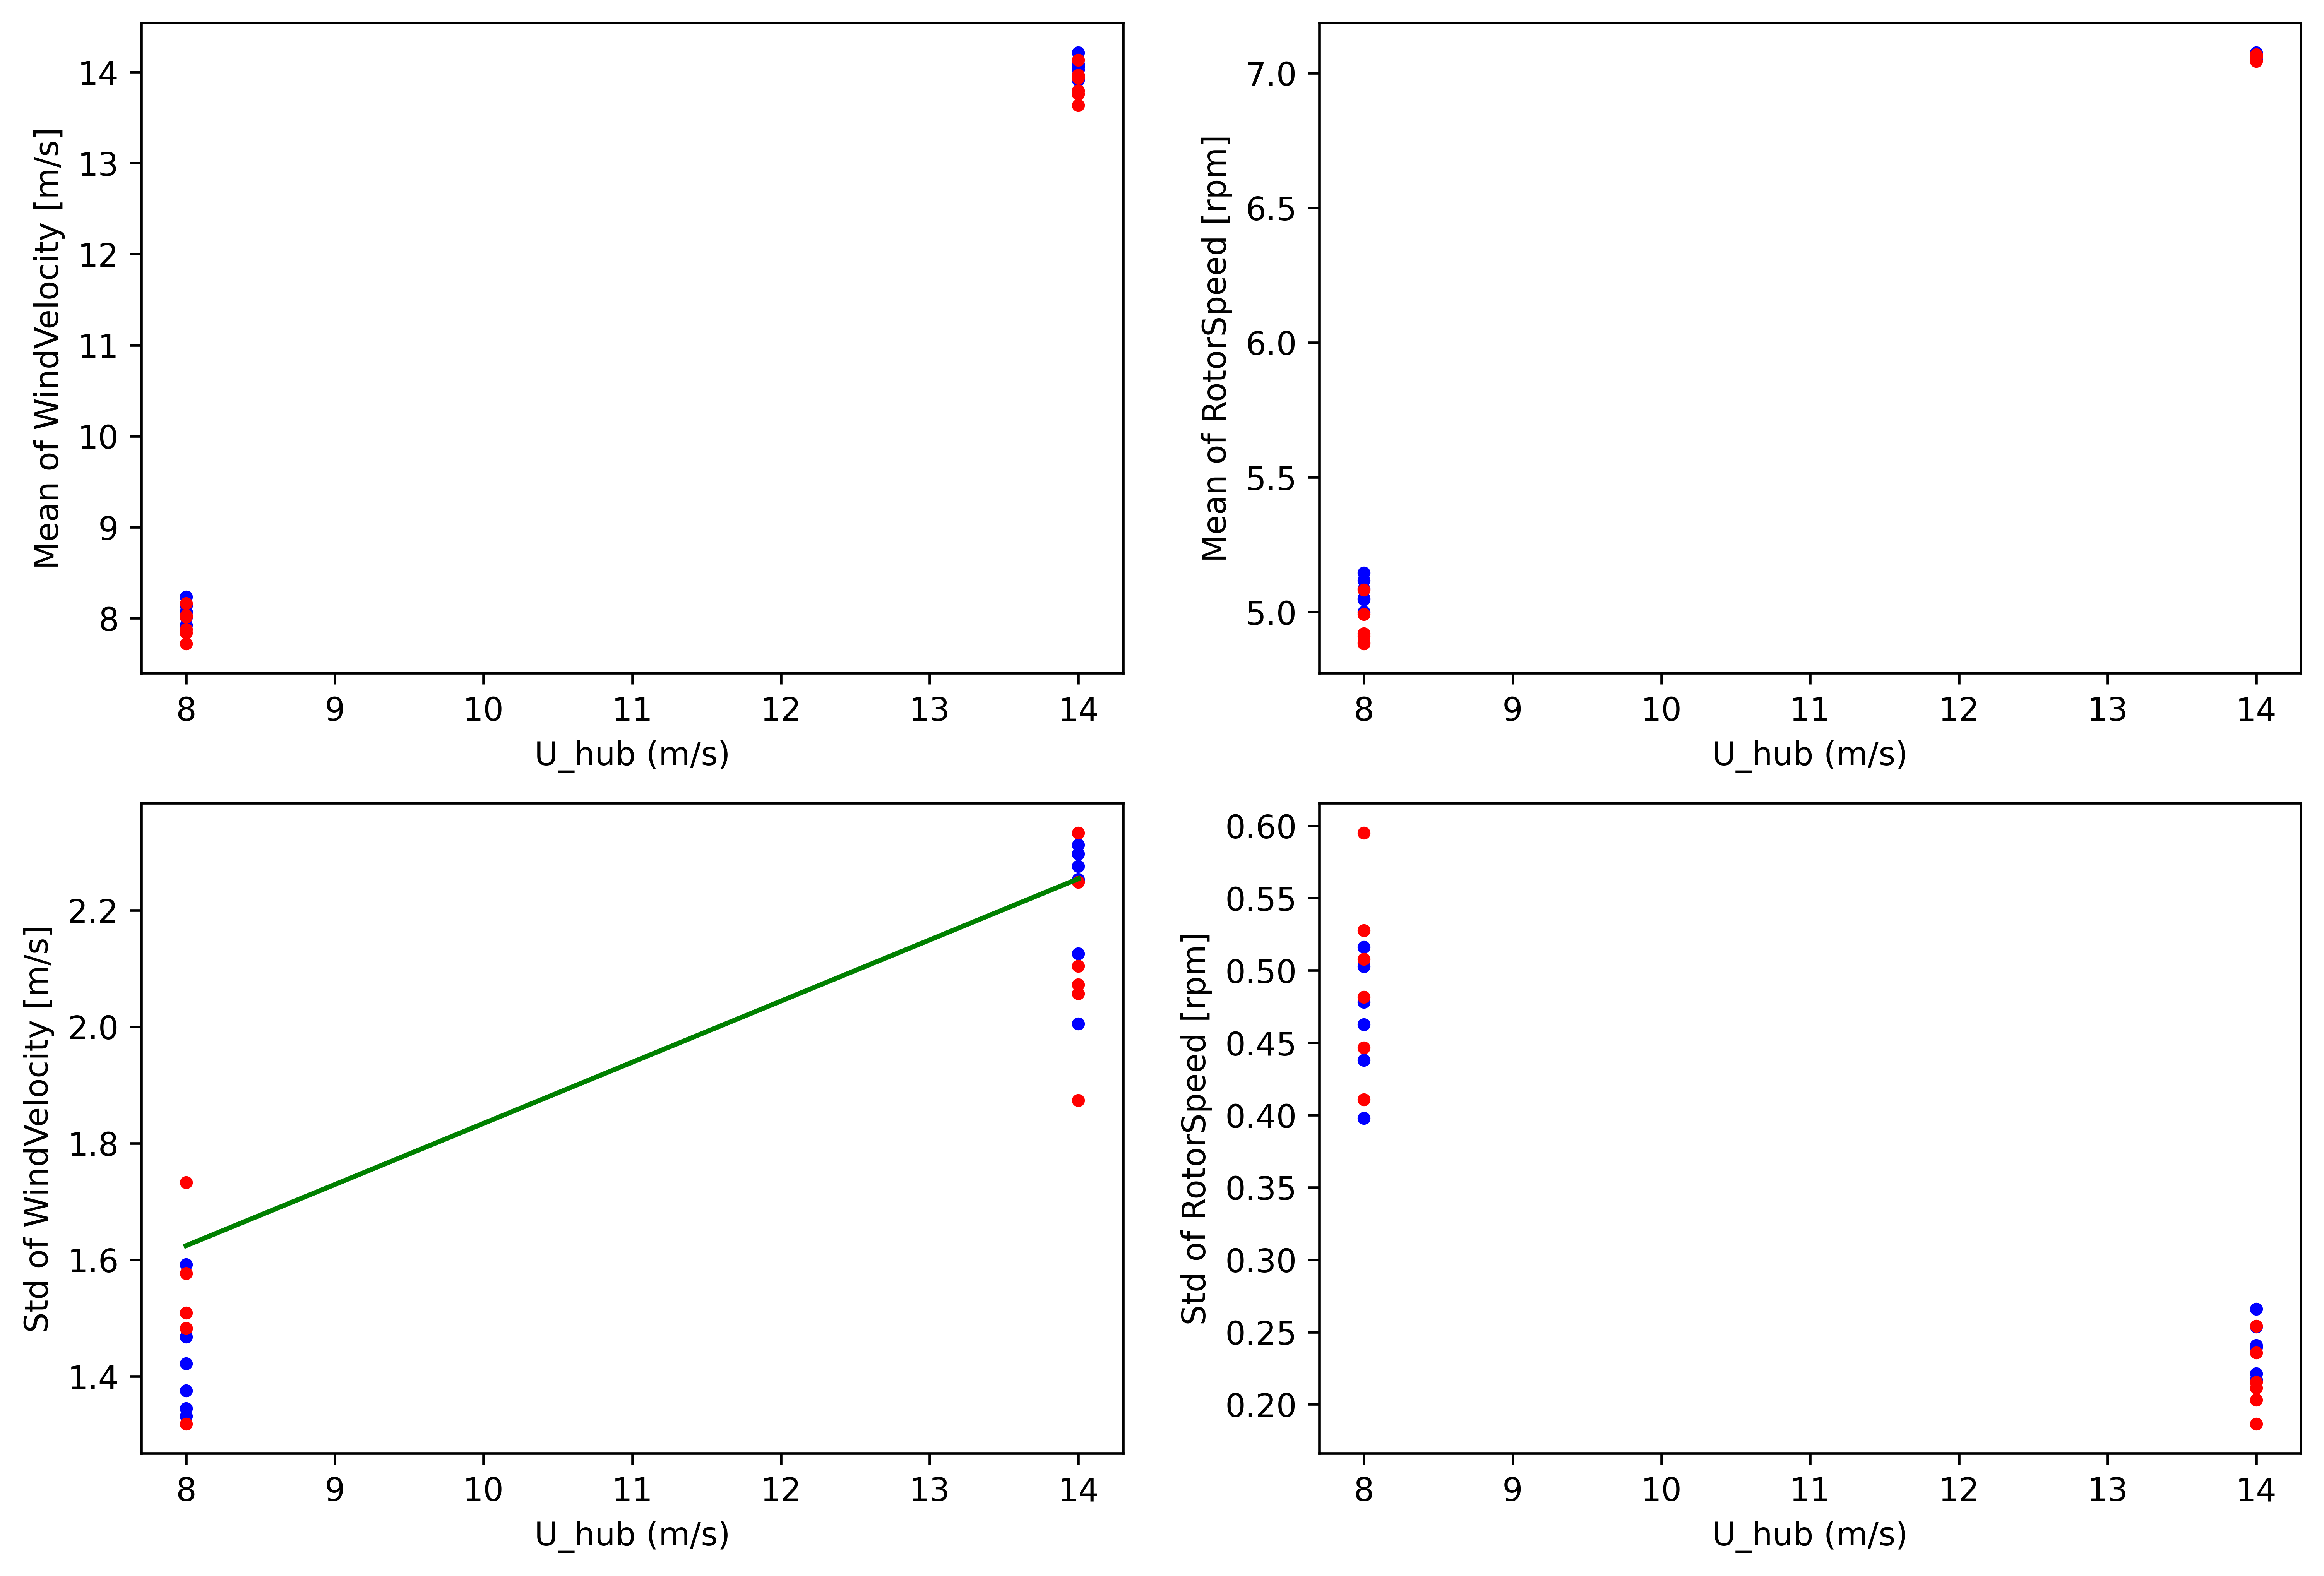

In [11]:
fig,ax = plt.subplots(2,2, figsize=(12, 8), dpi=600)

# dict_cond_colors = {
#     'ConstantWindSet_1':'black',
#     'ConstantWindSet_2':'black',
#     'Kaimal_TurbulentWindSet_1':'blue',
#     'Kaimal_TurbulentWindSet_2':'blue',
#     'Mann_TurbulentWindSet_1':'red',
#     'Mann_TurbulentWindSet_2':'red'
# }
dict_cond_colors = {'KaimalSet_1':'blue', 'KaimalSet_10':'blue', 'KaimalSet_11':'blue', 'KaimalSet_12':'blue', 'KaimalSet_2':'blue',
 'KaimalSet_3':'blue', 'KaimalSet_4':'blue', 'KaimalSet_5':'blue', 'KaimalSet_6':'blue', 'KaimalSet_7':'blue',
 'KaimalSet_8':'blue', 'KaimalSet_9':'blue', 'MannSet_1':'red', 'MannSet_10':'red', 'MannSet_11':'red',
 'MannSet_12':'red', 'MannSet_2':'red', 'MannSet_3':'red', 'MannSet_4':'red', 'MannSet_5':'red', 'MannSet_6':'red',
 'MannSet_7':'red', 'MannSet_8':'red', 'MannSet_9':'red'}

l = "IEC standard"
expected_sigmaU = lambda u : 0.14*(0.75*u + 5.6) # From IEC 61400-1:2019

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond})
    leg.append(cond)
    for j, output in enumerate(outputs):
        # print('Mean of ' + output + ' =' + str(run[output].mean()))
        ax[0,j].plot(dict_cond_x[cond], run[output].mean(), color = dict_cond_colors[cond],marker='.')
        ax[1,j].plot(dict_cond_x[cond], run[output].std(), color = dict_cond_colors[cond],marker='.')
        ax[0,j].set_xlabel(x_name)
        ax[0,j].set_ylabel('Mean of ' + output)
        ax[1,j].set_xlabel(x_name)
        ax[1,j].set_ylabel('Std of ' + output)

# ax[1,0].legend(leg, ncol=4)
# ax[0,0].legend(leg, ncol=4)
# ax[1,1].legend(leg, ncol=4)
# ax[0,1].legend(leg, ncol=4)
ax[1,0].plot(x_vals, expected_sigmaU(x_vals), color = 'green',ls='-')

### Consistence with litterature


----------Successfully extracted run to panda.Dataframe structure-----------

            Surge [m]  Sway [m]  Heave [m]  Roll [deg]  Pitch [deg]  \
time                                                                  
900.000013  16.997698 -0.127910   0.139497    0.260761     3.496790   
900.025013  16.996904 -0.128885   0.136512    0.259642     3.499066   
900.050013  16.996035 -0.129860   0.133474    0.258545     3.501314   
900.075013  16.995083 -0.130833   0.130381    0.257471     3.503530   
900.100013  16.994051 -0.131806   0.127234    0.256424     3.505710   

            Yaw [deg]  Xfairlead1 [m]  Yfairlead1 [m]  Zfairlead1 [m]  \
time                                                                    
900.000013   0.548563       75.025299        0.473191      -13.425098   
900.025013   0.546292       75.023994        0.469714      -13.430388   
900.050013   0.544024       75.022621        0.466247      -13.435705   
900.075013   0.541760       75.021172        0.462789     

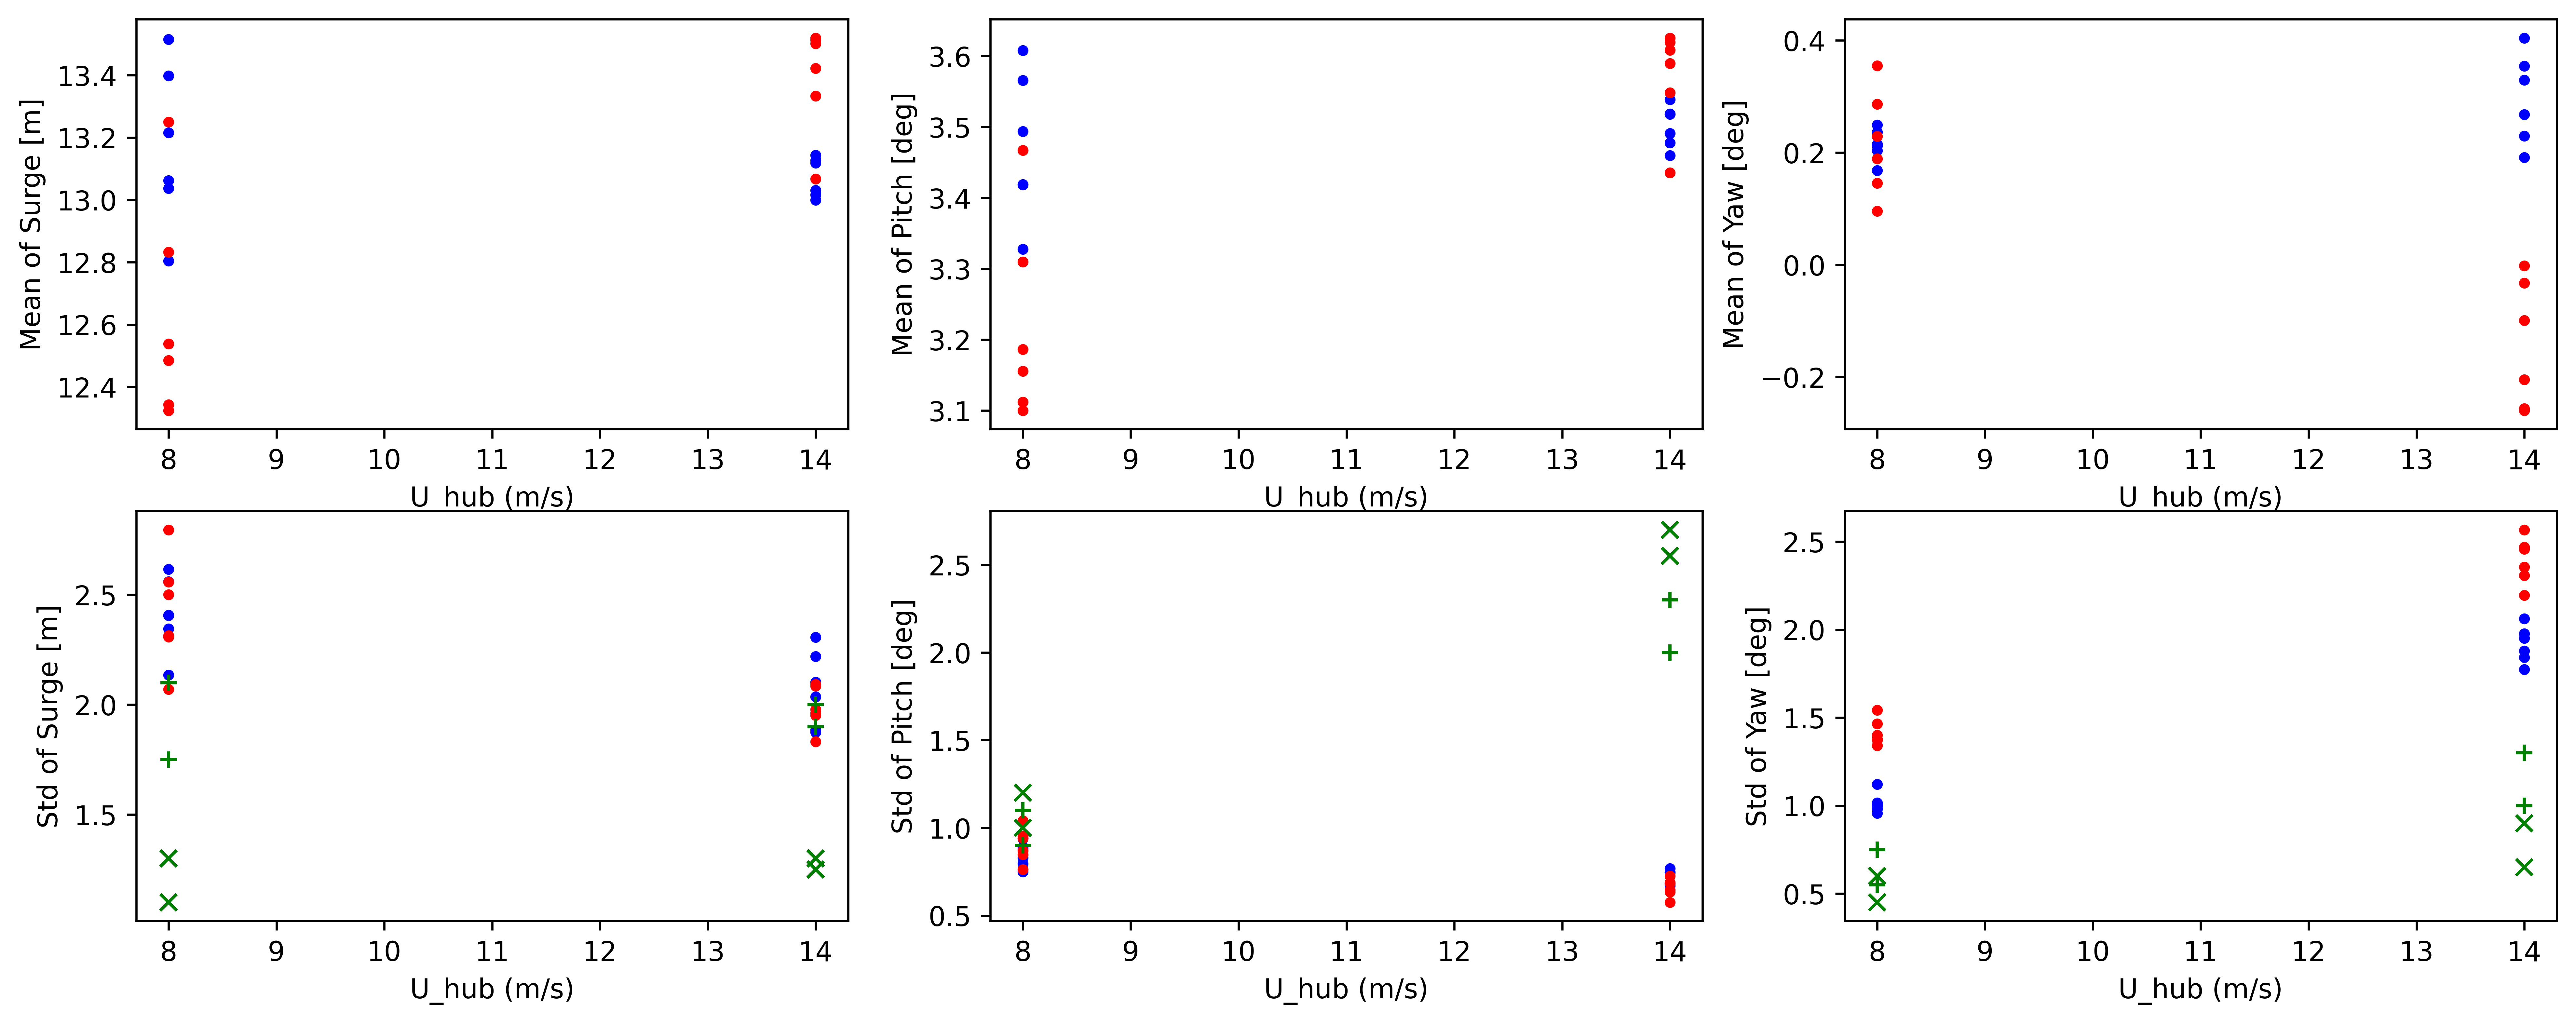

In [13]:
outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]']
# outputs = ['Surge [m]', 'Pitch [deg]', 'Yaw [deg]', 'TensionTopChainL1 [kN]']
fig,ax = plt.subplots(2,len(outputs), figsize=(16,6), dpi=600)

# Results from Bachynski / Eliasen
surge5MW = [
    {'Kaimal_TurbulentWindSet':1.3, 'Mann_TurbulentWindSet':1.1},
    {'Kaimal_TurbulentWindSet':1.3, 'Mann_TurbulentWindSet':1.25}
]
pitch5MW = [
    {'Kaimal_TurbulentWindSet':1.2, 'Mann_TurbulentWindSet':1},
    {'Kaimal_TurbulentWindSet':2.7, 'Mann_TurbulentWindSet':2.55}
]
yaw5MW = [
    {'Kaimal_TurbulentWindSet':0.45, 'Mann_TurbulentWindSet':0.6},
    {'Kaimal_TurbulentWindSet':0.65, 'Mann_TurbulentWindSet':0.9}
]
surge10MW = [
    {'Kaimal_TurbulentWindSet':2.1, 'Mann_TurbulentWindSet':1.75},
    {'Kaimal_TurbulentWindSet':2, 'Mann_TurbulentWindSet':1.9}
]
pitch10MW = [
    {'Kaimal_TurbulentWindSet':1.1, 'Mann_TurbulentWindSet':0.9},
    {'Kaimal_TurbulentWindSet':2.3, 'Mann_TurbulentWindSet':2}
]
yaw10MW = [
    {'Kaimal_TurbulentWindSet':0.55, 'Mann_TurbulentWindSet':0.75},
    {'Kaimal_TurbulentWindSet':1, 'Mann_TurbulentWindSet':1.3}
]
litterature = {
    'Surge [m]': [surge5MW, surge10MW], 
    'Pitch [deg]': [pitch5MW, pitch10MW],
    'Yaw [deg]': [yaw5MW, yaw10MW],
}

leg = []
for i, cond in enumerate(conds):
    run, var = H1_perm.extract_run({'model':'Baseline', 'analysis':'Dynamic', 'condition':cond})
    leg.append(cond)
    for j, output in enumerate(outputs):
        # print('Mean of ' + output + ' =' + str(run[output].mean()))
        ax[0,j].plot(dict_cond_x[cond], run[output].mean(), color = dict_cond_colors[cond],marker='.')
        ax[1,j].plot(dict_cond_x[cond], run[output].std(), color = dict_cond_colors[cond],marker='.')
        ax[0,j].set_xlabel(x_name)
        ax[0,j].set_ylabel('Mean of ' + output)
        ax[1,j].set_xlabel(x_name)
        ax[1,j].set_ylabel('Std of ' + output)

        if dict_cond_x[cond] == 8:
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][0]['Kaimal_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][0]['Kaimal_TurbulentWindSet'], color = 'green', marker='+')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][0]['Mann_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][0]['Mann_TurbulentWindSet'], color = 'green', marker='+')
        else:
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][1]['Kaimal_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][1]['Kaimal_TurbulentWindSet'], color = 'green', marker='+')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][0][1]['Mann_TurbulentWindSet'], color = 'green', marker='x')
            ax[1,j].plot(dict_cond_x[cond], litterature[output][1][1]['Mann_TurbulentWindSet'], color = 'green', marker='+')


# ax[1,0].legend(leg, ncol=4)
# ax[0,0].legend(leg, ncol=4)
# ax[1,1].legend(leg, ncol=4)
# ax[0,1].legend(leg, ncol=4)
